<a href="https://colab.research.google.com/github/woodword-0/Dating-Data/blob/main/C__Users_Field_Employee_Desktop_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

In [ ]:
df = pd.read_csv(r'C:\Users\Field Employee\Desktop\Algorithms\Data.csv', header = None)

pd.read_csv(r'C:\Users\Field Employee\Desktop\Algorithms\Data.csv', header = None)

In [ ]:
df.head()

,0,1,2
0,75.6,182.0,1.0
1,70.5,176.0,1.0
2,76.9,179.0,1.0
3,70.2,158.0,1.0
4,74.1,169.0,1.0


In [ ]:
X = df.to_numpy()

In [ ]:
y = X[:,-1]
X = X[:,:-1]

In [ ]:
y.shape

(1000,)

In [ ]:
X.shape

(1000, 2)

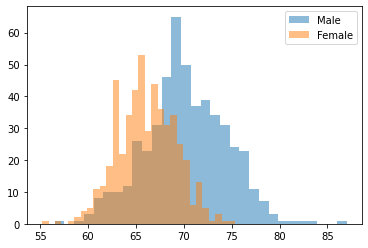

In [ ]:
plt.figure()
plt.hist(X[y==1,0], label = "Male", alpha = 0.5, bins = 30)
plt.hist(X[y== 0,0], label = "Female", alpha = 0.5, bins =  30)
plt.legend()

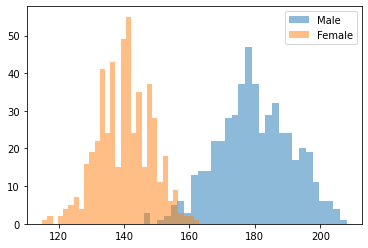

In [ ]:
plt.figure()
plt.hist(X[y==1,1], label = "Male", alpha = 0.5, bins = 30)
plt.hist(X[y== 0,1], label = "Female", alpha = 0.5, bins =  30)
plt.legend()

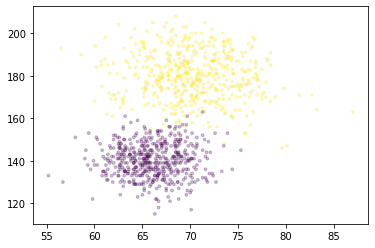

In [ ]:
plt.figure()
plt.scatter(X[:,0],X[:,1], c = y, alpha = 0.25, s = 8)

In [ ]:
class GaussNB():
    def fit(self, X,y, epsilon = 1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        
        self.K = set(y.astype(int))
        
        for k in self.K:
            X_k = X[y == k, :]
            self.likelihoods[k] = {"mean": X_k.mean(axis = 0), "cov":X_k.var(axis = 0) + epsilon}
            self.priors[k] = len(X_k)/len(X)
            
    def predict(self, X):
        N,D = X.shape #Observations and features
        #probability
        p_hat = np.zeros((N,len(self.K)))
        
        for k, l in self.likelihoods.items():
            p_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])
        
        return p_hat.argmax(axis = 1)

In [ ]:
gnb = GaussNB()

In [ ]:
gnb.fit(X,y)

In [ ]:
y_hat = gnb.predict(X)

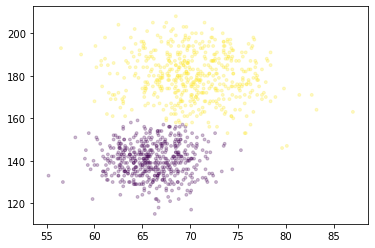

In [ ]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c = y_hat, alpha = 0.25, s = 8)
#plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.25, s = 8)

In [ ]:
def accuracy(y,y_hat):
    return np.mean(y == y_hat)

In [ ]:
accuracy(y,y_hat)

0.988

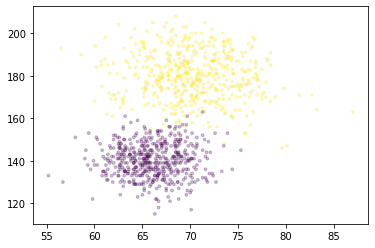

In [ ]:
plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.25, s = 8)

In [ ]:
X_New = np.asarray([[70,150]])

In [ ]:
y_hat_New = gnb.predict(X_New)

In [ ]:
y_hat_New

array([0], dtype=int64)